# Data Mining
## Semester Project
### Supervisors: Dr. Sibt-ul-Hussain and Atique-ur-Rehman
#### By: Zeeshan Ali, i14-1623, A
###### Prediction of Gap in the Test Data -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
%pylab inline
import scipy.stats
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import os
from sklearn import datasets, linear_model

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
print "Matplotlib version : ", matplotlib.__version__
print "Pandas version : ", pd.__version__
print "Numpy version : ", np.__version__
print "Scipy version : ", scipy.__version__
print "Seaborn version : ", sns.__version__
print "Sklearn version : ", sk.__version__
print "Tensorflow version : ", tf.__version__

Matplotlib version :  2.0.0
Pandas version :  0.19.2
Numpy version :  1.11.3
Scipy version :  0.18.1
Seaborn version :  0.7.1
Sklearn version :  0.18.1
Tensorflow version :  1.1.0


In [4]:
# Load the train dataset to a new dataframe
train = pd.read_csv('Supply_Demand_train_data')
train.gap.describe()

count    163491.000000
mean          9.275495
std          49.817422
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        3872.000000
Name: gap, dtype: float64

In [56]:
66*21*144 - train.shape[0]

47520

In [5]:
# Separate the train_X as a matrix from train dataframe
train_X = train.as_matrix(columns = np.array(train.columns[1:9]))
train_X.shape

(163491, 8)

In [6]:
# Separate the train_Y as a matrix from train dataframe
train_Y = train.as_matrix(columns = ['gap'])
train_Y.shape

(163491, 1)

In [7]:
# Load the test dataset to a new dataframe
test = pd.read_csv('Supply_Demand_test_data')
test.tail()

,start_region_hash,Weather,temperature,PM2_5,Day,Month,Time_slot,Facilities,region_id,Date
7885,7f84bdfc2b6d4541e1f6c0a3349e0251,3.0,-1.0,3.0,23,1,67,166,52,2016-01-23
7886,7f84bdfc2b6d4541e1f6c0a3349e0251,4.0,4.0,4.0,23,1,102,166,52,2016-01-23
7887,825c426141df01d38c1b9e9c5330bdac,2.0,-4.0,2.0,23,1,139,679,30,2016-01-23
7888,de092beab9305613aca8f79d7d7224e7,4.0,4.0,4.0,23,1,43,830,61,2016-01-23
7889,08f5b445ec6b29deba62e6fd8b0325a6,4.0,4.0,4.0,23,1,43,430,43,2016-01-23


In [8]:
66*5*144 - test.shape[0]

39630

In [9]:
# Separate the train_X as a matrix from train dataframe
test_X = test.as_matrix(columns = np.array(test.columns[1:9]))
test_X.shape

(7890, 8)

In [10]:
# Create a linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_X, train_Y)

# The coefficients
print('Coefficients: ', regr.coef_)

# Predict the 'driver_id' for train data
predicted_train_Y = regr.predict(train_X)

# The mean squared error
print("Mean squared error: %.2f" % np.mean((train_Y - predicted_train_Y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(train_X, predicted_train_Y))

# Predict the 'driver_id' for test data
predicted_test_Y = regr.predict(test_X)

('Coefficients: ', array([[ -3.62688249e-02,  -4.07204201e-02,   1.60656186e-02,
          1.72190736e-01,   5.20417043e-17,   2.76047645e-02,
          3.40151714e-03,   3.10187766e-02]]))
Mean squared error: 2165.03
Variance score: 1.00


In [11]:
# Assign a new column named 'driver_id' to the test dataframe
updated_test_df = test.assign(gap = map(int, predicted_test_Y))
updated_test_df.head()

,start_region_hash,Weather,temperature,PM2_5,Day,Month,Time_slot,Facilities,region_id,Date,gap
0,d4ec2125aff74eded207d2d915ef682f,4.0,4.0,4.0,27,1,54,31088,51,2016-01-27,106
1,b05379ac3f9b7d99370d443cfd5dcc28,3.0,3.0,3.0,27,1,43,6816,37,2016-01-27,23
2,44c097b7bd219d104050abbafe51bd49,4.0,5.0,4.0,27,1,78,609,35,2016-01-27,3
3,82cc4851f9e4faa4e54309f8bb73fd7c,4.0,4.0,4.0,27,1,127,14166,8,2016-01-27,49
4,38d5ad2d22b61109fd8e7b43cd0e8901,4.0,4.0,4.0,27,1,116,4341,24,2016-01-27,16


In [12]:
updated_test_df.tail()

,start_region_hash,Weather,temperature,PM2_5,Day,Month,Time_slot,Facilities,region_id,Date,gap
7885,7f84bdfc2b6d4541e1f6c0a3349e0251,3.0,-1.0,3.0,23,1,67,166,52,2016-01-23,1
7886,7f84bdfc2b6d4541e1f6c0a3349e0251,4.0,4.0,4.0,23,1,102,166,52,2016-01-23,2
7887,825c426141df01d38c1b9e9c5330bdac,2.0,-4.0,2.0,23,1,139,679,30,2016-01-23,4
7888,de092beab9305613aca8f79d7d7224e7,4.0,4.0,4.0,23,1,43,830,61,2016-01-23,3
7889,08f5b445ec6b29deba62e6fd8b0325a6,4.0,4.0,4.0,23,1,43,430,43,2016-01-23,1


In [1]:
updated_test_df.gap.describe()

NameError: name 'updated_test_df' is not defined

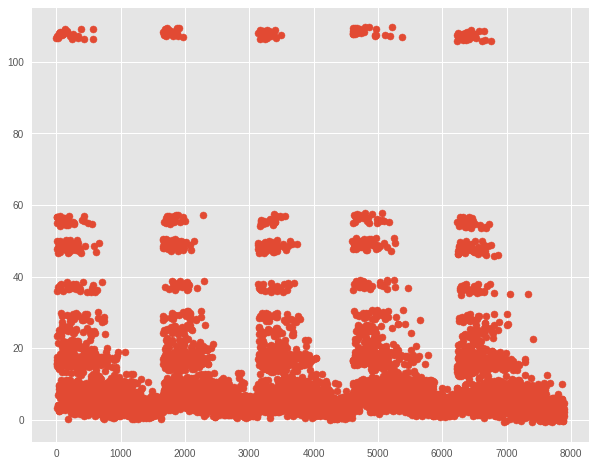

In [14]:
# Analyse the gaps predicted above
plt.scatter(range(predicted_test_Y.shape[0]), predicted_test_Y)

In [15]:
predicted_gap = {}
for index in range(updated_test_df.shape[0]):
    dist = updated_test_df.start_region_hash[index]
    Date = updated_test_df.Date[index]
    slot = updated_test_df.Time_slot[index]
    predicted_gap[dist + '_' + Date + '_' + str(slot)] = updated_test_df.gap[index]

Id, gap = [], []
firstLine = True
import csv
with open('sample.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        if firstLine:
            firstLine = False
        else:
            key = ', '.join(row).split(',')[0]
            Id.append(key)
            if key in predicted_gap.keys():
                gap.append(predicted_gap[key])
            else:
                gap.append(0)


predicted_gap = pd.DataFrame({'id':Id})
predicted_gap = predicted_gap.assign(gap = gap)
predicted_gap.head()

,id,gap
0,08232402614a9b48895cc3d0aeb0e9f2_2016-01-23_0,0
1,08f5b445ec6b29deba62e6fd8b0325a6_2016-01-23_0,0
2,0a5fef95db34383403d11cb6af937309_2016-01-23_0,0
3,1afd7afbc81ecc1b13886a569d869e8a_2016-01-23_0,0
4,1c60154546102e6525f68cb4f31e0657_2016-01-23_0,0


In [16]:
predicted_gap.to_csv('predicted_gap.csv', index=False)

In [17]:
predicted_gap.shape

(47520, 2)

In [18]:
predicted_gap = predicted_gap.sort()

/home/zeeshan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


In [19]:
predicted_gap[predicted_gap.gap == 0].shape

(39767, 2)

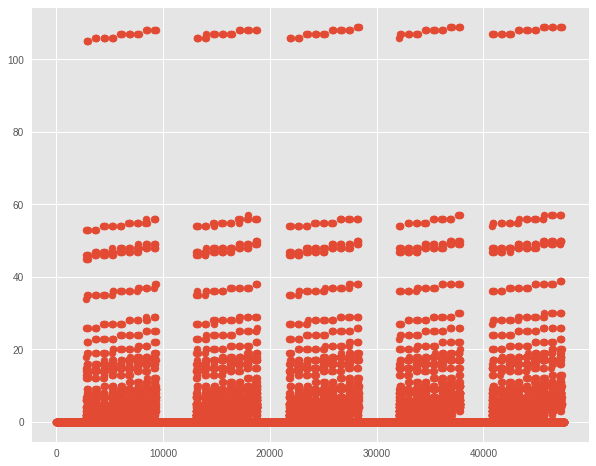

In [20]:
plt.scatter(range(len(gap)), gap)